In [98]:
import pandas as pd
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib
from pandas import DataFrame

In [99]:
df = pd.read_csv("sorted_pmax_data_for_plot.csv")

df_pmax = df["Pmax [N]"]
df_index = df["Unnamed: 0"]

In [100]:
def read(file):
    return pd.read_csv(file)
features = read('csv_data.csv')

In [101]:
pd.options.display.max_columns = 30
pd.options.display.max_columns = 181
pd.options.display.max_rows = 181

In [102]:
pmax = np.array(features['Pmax [N]'])
features = features.drop('Pmax [N]', axis = 1)

features = StandardScaler().fit_transform(features)

In [120]:
features = np.array(features)
train_features, test_features, train_labels, test_labels = train_test_split(features, pmax, test_size = 0.25, random_state = 42)

In [105]:
clf = svm.SVR(kernel = "rbf")
clf.fit(train_features,train_labels)
print(clf.score(train_features, train_labels))
print(test_labels.shape)

0.4665054619980621
(45,)


C:\Users\fmh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [106]:
pmax_pred = np.empty(test_labels.shape)

In [107]:

errors = 0
i = 0
for X,y in zip(test_features, test_labels):
#    print(f"Model: {clf.predict([X])[0]}, Actual: {y}")
    errors += abs(clf.predict([X])[0] - y)
    pmax_pred[i] = clf.predict([X])[0]
    i += 1 
    
errors = errors / test_features.shape[0]
print(pmax_pred)

#print('Mean Absolute error:',round(errors, 2) , 'newton.')

# Calculate mean absolute percentage error
#mape = 100 * (errors / test_labels)

# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')


[18.04022822 11.09563968 10.80168956 35.61397747 25.05918517 27.89892576
 10.33994892 35.59027603 10.47988548 19.11184134 22.55962347 18.86574712
 15.31193973 10.24373652 14.84769836 19.4022343  13.37728397 20.13590238
 12.85757301 27.16885653 36.00324252 16.24518563 31.90342334 32.83263209
 37.0610832  11.9059489  36.32417529 16.26513725 37.7117193  17.27900781
 26.35108014 12.15371342 20.36391624 14.00417543 34.41201839 18.48400601
 28.02350663 10.40840999 10.67533913 25.36916813 36.09407207 11.92530135
 31.23092717 16.91982928 26.77217872]


In [108]:
#new = DataFrame(pmax_pred, test_labels)
#new.to_csv("line_to_scatter_converter.csv")

In [109]:
mid = pd.read_csv("line_to_scatter_converter.csv")
mid.sort_values(by = "ground_truth", inplace = True)
mid.to_csv("lts_sort.csv", index = False)

In [110]:
final = pd.read_csv("lts_sort.csv")
index = final.index
pmax_pred = final["clf_prediction"]
label = final["ground_truth"]

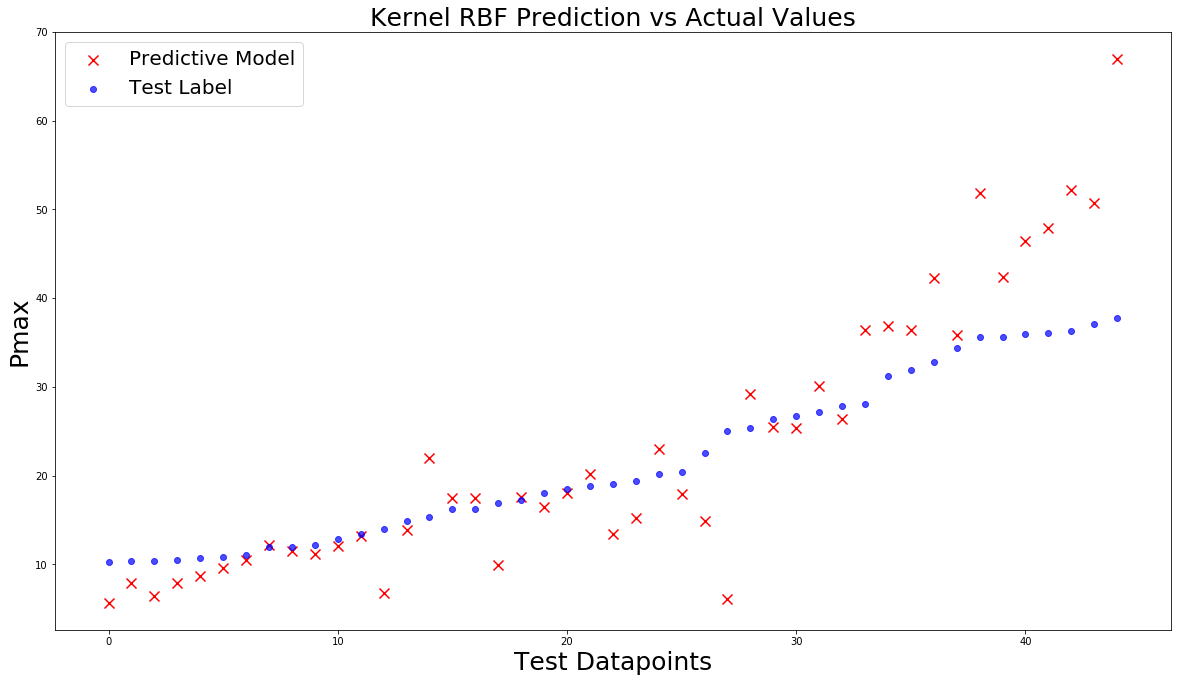

In [123]:
fig = plt.figure(figsize=(20,11))
plt.xlabel("Test Datapoints", fontsize = 25)
plt.ylabel("Pmax", fontsize = 25)
plt.title("Kernel RBF Prediction vs Actual Values", fontsize = 25)

plt.scatter(index, pmax_pred, color = "r", label = "Predictive Model", marker = "x", s = 100)
plt.scatter(index, label, color = "b", alpha = 0.7, label = "Test Label")

plt.legend(loc = 2, prop = {"size" : 20})



plt.savefig("RBF_plot.png")